In [1]:
from sklearn.datasets import make_blobs , make_classification ,  make_circles
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd
import seaborn as sns

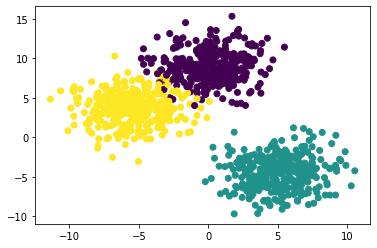

In [2]:
X , y = make_blobs(n_samples=1000 , n_features=2 , random_state=23, cluster_std=2)
plt.scatter(X[: , 0] , X[: , 1] , c=y);

In [3]:
X.shape , y.shape

((1000, 2), (1000,))

In [4]:
first_y = np.where((y==1)|(y==2) , y , 3)
first_y = np.where(first_y==3 , first_y , 0)
first_y = np.where(first_y==0 , first_y , 1)

In [5]:
second_y = np.where(y==1 , y , 0)

In [6]:
third_y = np.where(y==2 , y , 0)
third_y = np.where(third_y==0 , third_y , 1)

In [7]:
third_y = np.where(y==2 , y , 0)
third_y = np.where(third_y==0 , third_y , 1)

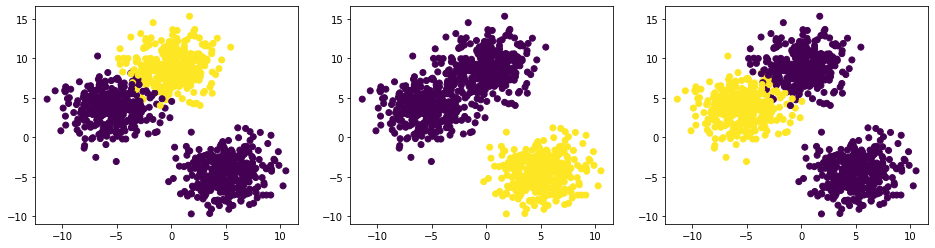

In [8]:
fig , ax = plt.subplots(1 , 3 , figsize=(16,4))

for i,yi in enumerate([first_y , second_y , third_y]):
    ax[i].scatter(X[: , 0] , X[: , 1] , c=yi);

In [9]:
first_model = LogisticRegression()
first_model.fit(X , first_y.ravel())

LogisticRegression()

In [10]:
second_model = LogisticRegression()
second_model.fit(X , second_y.ravel())

LogisticRegression()

In [11]:
third_model = LogisticRegression()
third_model.fit(X , third_y.ravel())

LogisticRegression()

In [12]:
x1 = np.linspace(X[: ,0].min() , X[:, 0].max() , 200)
x2 = np.linspace(X[: ,1].min() , X[:, 1].max() , 200)

x1m , x2m = np.meshgrid(x1 , x2)

In [13]:
x1r = x1m.ravel()
x2r = x2m.ravel()

Xm = np.stack((x1r , x2r))
Xm = Xm.T

In [14]:
region_a = first_model.predict_proba(Xm)
region_a = region_a[: ,1]

In [15]:
region_b = second_model.predict_proba(Xm)
region_b = region_b[: ,1]

In [16]:
region_c = third_model.predict_proba(Xm)
region_c = region_c[: ,1]

In [17]:
regions = np.stack((region_a , region_b , region_c) , axis=1)
out = np.argmax(regions , axis=1)

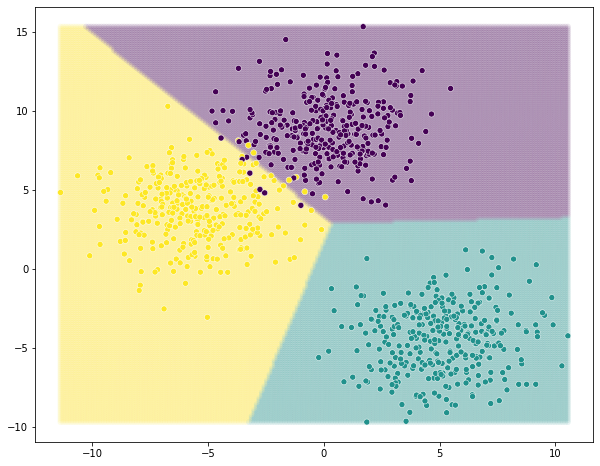

In [18]:
plt.figure(figsize=(10 , 8))
sns.scatterplot(x=Xm[: , 0] , y=Xm[: , 1] , c=out , alpha=0.1);
sns.scatterplot(x=X[: , 0] , y=X[: , 1] , c=y );